**本实践使用多层感知器训练（DNN）模型，用于预测手写数字图片。**

![](https://ai-studio-static-online.cdn.bcebos.com/4c7206c4ba444963981b43118627fcbf1e67f94840d144bfb7b00265cf63dcfd)


首先导入必要的包

numpy---------->python第三方库，用于进行科学计算

PIL------------> Python Image Library,python第三方图像处理库

matplotlib----->python的绘图库 pyplot:matplotlib的绘图框架

os------------->提供了丰富的方法来处理文件和目录

In [1]:
#导入需要的包
import numpy as np
import paddle as paddle
import paddle.nn as nn
import paddle.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import os
print("本教程基于Paddle的版本号为："+paddle.__version__)

# 设置随机种子
paddle.seed(2023)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


本教程基于Paddle的版本号为：2.2.2


# **Step1：准备数据。**

(1)数据集介绍

MNIST数据集包含60000个训练集和10000测试数据集。分为图片和标签，图片是28*28的像素矩阵，标签为0~9共10个数字。

![](https://ai-studio-static-online.cdn.bcebos.com/fc73217ae57f451a89badc801a903bb742e42eabd9434ecc8089efe19a66c076)

(2)transform函数是定义了一个归一化标准化的标准

(3)train_dataset和test_dataset

paddle.vision.datasets.MNIST()中的mode='train'和mode='test'分别用于获取mnist训练集和测试集

transform=transform参数则为归一化标准


In [2]:
#导入数据集Compose的作用是将用于数据集预处理的接口以列表的方式进行组合。
#导入数据集Normalize的作用是图像归一化处理，支持两种方式： 1. 用统一的均值和标准差值对图像的每个通道进行归一化处理； 2. 对每个通道指定不同的均值和标准差值进行归一化处理。
from paddle.vision.transforms import Compose, Normalize
transform = Compose([Normalize(mean=[127.5],std=[127.5],data_format='CHW')])
# 使用transform对数据集做归一化
print('下载并加载训练数据')
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)
print('加载完成')

下载并加载训练数据


Cache file /home/aistudio/.cache/paddle/dataset/mnist/train-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/train-images-idx3-ubyte.gz 
Begin to download


item  302/2421 [==>...........................] - ETA: 2s - 1ms/
item 8/8 [============================>.] - ETA: 0s - 2ms/it


Download finished
Cache file /home/aistudio/.cache/paddle/dataset/mnist/train-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/train-labels-idx1-ubyte.gz 
Begin to download

Download finished


item  68/403 [====>.........................] - ETA: 1s - 3ms/ite

Cache file /home/aistudio/.cache/paddle/dataset/mnist/t10k-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/t10k-images-idx3-ubyte.gz 
Begin to download


item 190/403 [=============>................] - ETA: 0s - 2ms/itemitem 212/403 [==============>...............] - ETA: 0s - 2ms/
item 2/2 [===========================>..] - ETA: 0s - 2ms/item


Download finished
Cache file /home/aistudio/.cache/paddle/dataset/mnist/t10k-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/t10k-labels-idx1-ubyte.gz 
Begin to download

Download finished


加载完成


AxesImage(25,22;155x154)
train_data0 的标签为: [5]


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/image.py:426: DeprecationWarning: np.asscalar(a) is deprecated since Num

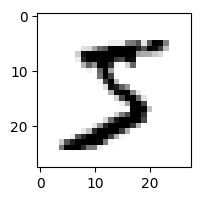

In [3]:
#让我们一起看看数据集中的图片是什么样子的
train_data0, train_label_0 = train_dataset[0][0],train_dataset[0][1]
train_data0 = train_data0.reshape([28,28])
plt.figure(figsize=(2,2))
print(plt.imshow(train_data0, cmap=plt.cm.binary))
print('train_data0 的标签为: ' + str(train_label_0))


In [4]:
#让我们再来看看数据样子是什么样的吧
print(train_data0)

[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.  

# **Step2.网络配置**
以下的代码判断就是定义一个简单的多层感知器，一共有三层，两个大小为100的隐层和一个大小为10的输出层，因为MNIST数据集是手写0到9的灰度图像，类别有10个，所以最后的输出大小是10。最后输出层的激活函数是Softmax，所以最后的输出层相当于一个分类器。加上一个输入层的话，多层感知器的结构是：输入层-->>隐层-->>隐层-->>输出层。

![](https://ai-studio-static-online.cdn.bcebos.com/cb69f928778c4299b75814179607a89eea770bdc409d4e08a87e2975cb96b19b)

In [5]:
# 定义多层感知器 
#动态图定义多层感知器
class mnist(paddle.nn.Layer):
    def __init__(self):
        super(mnist,self).__init__()
        self.fc1 = nn.Linear(in_features =28*28, out_features =100)
        self.fc2 = nn.Linear(in_features =100, out_features =100)
        self.fc3 = nn.Linear(in_features =100, out_features =10)

    def forward(self, input_):
        x = paddle.reshape(input_, [input_.shape[0], -1])
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        y = F.softmax(x)
        return y

In [6]:
########## edition ii ##########

# 动态图定义LeNet模型
class LeNet(paddle.nn.Layer):
    def __init__(self, num_classes=10):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2D(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.max_pool1 = nn.MaxPool2D(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2D(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.max_pool2 = nn.MaxPool2D(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool2(x)
        x = paddle.flatten(x, start_axis=1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x)
        return x

# 定义AlexNet模型
class AlexNet(paddle.nn.Layer):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2D(1, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(),
            nn.MaxPool2D(kernel_size=3, stride=2),
            nn.Conv2D(96, 256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2D(kernel_size=3, stride=2),
            nn.Conv2D(256, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2D(384, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2D(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2D(kernel_size=3, stride=2)
        )
        self.fc1 = nn.Linear(256 * 5 * 5, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = paddle.flatten(x, start_axis=1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x)
        return x

# 定义VGG模型
class VGG(paddle.nn.Layer):
    def __init__(self, num_classes=10):
        super(VGG, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2D(1, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2D(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2D(kernel_size=2, stride=2),
            nn.Conv2D(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2D(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2D(kernel_size=2, stride=2),
            nn.Conv2D(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2D(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2D(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2D(kernel_size=2, stride=2),
            nn.Conv2D(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2D(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2D(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2D(kernel_size=2, stride=2),
            nn.Conv2D(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2D(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2D(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2D(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(512 * 1 * 1, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = paddle.flatten(x, start_axis=1)
        x = self.fc_layers(x)
        x = F.softmax(x)
        return x




In [7]:
from paddle.metric import Accuracy

# 用Model封装模型
model = paddle.Model(mnist())   
# 定义损失函数
optim = paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters())
# 配置模型
model.prepare(optim,paddle.nn.CrossEntropyLoss(),Accuracy())

In [8]:
# 创建LeNet模型
model1 = paddle.Model(LeNet())
# 定义损失函数
optimizer1 = paddle.optimizer.Adam(learning_rate=0.001, parameters=model1.parameters())
# 配置模型
model1.prepare(optimizer1, paddle.nn.CrossEntropyLoss(), Accuracy())

 # **Step3.模型训练及评估**

In [9]:
# 训练保存并验证模型
model.fit(train_dataset,test_dataset,epochs=15,batch_size=256,save_dir='multilayer_perceptron',verbose=1)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/15


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:77: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return (isinstance(seq, collections.Sequence) and


step 235/235 [==============================] - loss: 1.5619 - acc: 0.8071 - 31ms/step        
save checkpoint at /home/aistudio/multilayer_perceptron/0
Eval begin...
step 40/40 [==============================] - loss: 1.5484 - acc: 0.9118 - 26ms/step        
Eval samples: 10000
Epoch 2/15
step 235/235 [==============================] - loss: 1.5612 - acc: 0.9201 - 28ms/step        
save checkpoint at /home/aistudio/multilayer_perceptron/1
Eval begin...
step 40/40 [==============================] - loss: 1.5463 - acc: 0.9218 - 27ms/step        
Eval samples: 10000
Epoch 3/15
step 235/235 [==============================] - loss: 1.4986 - acc: 0.9362 - 29ms/step        
save checkpoint at /home/aistudio/multilayer_perceptron/2
Eval begin...
step 40/40 [==============================] - loss: 1.4705 - acc: 0.9429 - 24ms/step        
Eval samples: 10000
Epoch 4/15
step 235/235 [==============================] - loss: 1.4879 - acc: 0.9450 - 30ms/step        
save checkpoint at /home/aistudi

In [10]:
# 训练LeNet模型
model1.fit(train_dataset, test_dataset, epochs=15, batch_size=256, save_dir='lenet', verbose=1)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/15
step 235/235 [==============================] - loss: 1.6563 - acc: 0.7068 - 72ms/step        
save checkpoint at /home/aistudio/lenet/0
Eval begin...
step 40/40 [==============================] - loss: 1.5872 - acc: 0.7716 - 27ms/step        
Eval samples: 10000
Epoch 2/15
step 235/235 [==============================] - loss: 1.6671 - acc: 0.8224 - 74ms/step         
save checkpoint at /home/aistudio/lenet/1
Eval begin...
step 40/40 [==============================] - loss: 1.5228 - acc: 0.8746 - 27ms/step        
Eval samples: 10000
Epoch 3/15
step 235/235 [==============================] - loss: 1.6242 - acc: 0.8781 - 71ms/step        
save checkpoint at /home/aistudio/lenet/2
Eval begin...
step 40/40 [==============================] - loss: 1.5235 - acc: 0.8843 - 27ms/step        
Eval samples: 10000
Epoch 4/15
step 235/235 [==============================] - loss:

 # **Step4.模型预测**

AxesImage(25,22;155x154)
test_data0 的标签为: [7]
Predict begin...
step 10000/10000 [==============================] - 2ms/step        
Predict samples: 10000
test_data0 通过多层感知机模型预测的数值为：7
Predict begin...
step 10000/10000 [==============================] - 2ms/step        
Predict samples: 10000
test_data0 通过LeNet模型预测的数值为：7


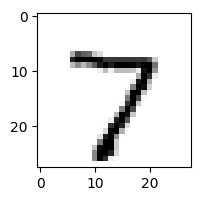

In [11]:
#获取测试集的第一个图片
test_data0, test_label_0 = test_dataset[0][0],test_dataset[0][1]
test_data0 = test_data0.reshape([28,28])
plt.figure(figsize=(2,2))
#展示测试集中的第一个图片
print(plt.imshow(test_data0, cmap=plt.cm.binary))
print('test_data0 的标签为: ' + str(test_label_0))
#模型预测
result = model.predict(test_dataset, batch_size=1)
#打印模型预测的结果
print('test_data0 通过多层感知机模型预测的数值为：%d' % np.argsort(result[0][0])[0][-1])


#模型预测
result1 = model1.predict(test_dataset, batch_size=1)
#打印模型预测的结果
print('test_data0 通过LeNet模型预测的数值为：%d' % np.argsort(result1[0][0])[0][-1])


模型性能分析

Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1


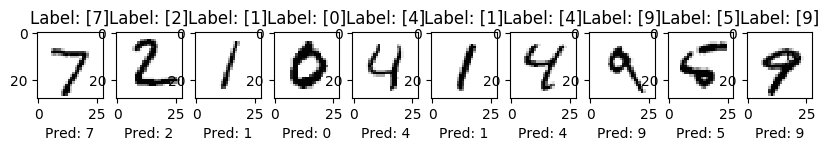

In [12]:
#结果可视化

# 选择几个样本进行预测和可视化展示
#选择10个样本进行预测，并将测试样本的原始标签和模型预测的标签可视化展示出来。
num_samples = 10

plt.figure(figsize=(10, 4))
for i in range(num_samples):
    test_data, test_label = test_dataset[i][0], test_dataset[i][1]
    test_data = test_data.reshape([28, 28])

    plt.subplot(1, num_samples, i+1)
    plt.imshow(test_data, cmap=plt.cm.binary)
    plt.title(f'Label: {test_label}')

    # 模型预测
    result = model.predict(np.expand_dims(test_dataset[i][0], axis=0))
    pred_label = np.argmax(result)

    plt.xlabel(f'Pred: {pred_label}')

plt.show()

Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1
Predict begin...
step 1/1 [==============================] - 2ms/step
Predict samples: 1


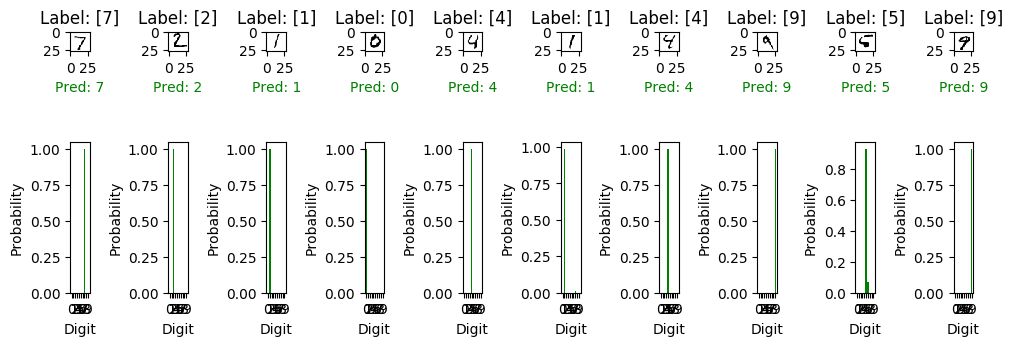

In [13]:
num_samples = 10

plt.figure(figsize=(10, 4))
for i in range(num_samples):
    test_data, test_label = test_dataset[i][0], test_dataset[i][1]
    test_data = test_data.reshape([28, 28])

    plt.subplot(2, num_samples, i+1)
    plt.imshow(test_data, cmap=plt.cm.binary)
    plt.title(f'Label: {test_label}')

    # 模型预测
    result = model.predict(np.expand_dims(test_dataset[i][0], axis=0))
    pred_label = np.argmax(result)

    if pred_label == test_label:
        pred_color = 'green'  # 预测正确的样本标签显示为绿色
    else:
        pred_color = 'red'  # 预测错误的样本标签显示为红色

    plt.xlabel(f'Pred: {pred_label}', color=pred_color)

    plt.subplot(2, num_samples, num_samples + i + 1)
    result = np.array(result)  # 将预测结果转换为NumPy数组
    plt.bar(range(10), result.ravel(), color=pred_color)  # 使用ravel()方法展平数组
    plt.xticks(range(10))
    plt.xlabel('Digit')
    plt.ylabel('Probability')

plt.tight_layout()
plt.show()

In [14]:
#泛化能力测试

# 在测试集上评估模型的性能：对于泛化能力测试，可以使用测试集中的所有样本来评估模型的性能。
result = model.evaluate(test_dataset, batch_size=64, verbose=1)
print('多层感知机模型测试集上的准确率为: {:.2%}'.format(result['acc']))

########## edition ii ##########
# 在测试集上评估模型的性能
result1 = model1.evaluate(test_dataset, batch_size=64, verbose=1)
print('LeNet模型在测试集上的准确率为: {:.2%}'.format(result1['acc']))


Eval begin...
step 157/157 [==============================] - loss: 1.4659 - acc: 0.9675 - 12ms/step        
Eval samples: 10000
多层感知机模型测试集上的准确率为: 96.75%
Eval begin...
step 157/157 [==============================] - loss: 1.4612 - acc: 0.9886 - 10ms/step        
Eval samples: 10000
LeNet模型在测试集上的准确率为: 98.86%


In [ ]:
# 获取测试集中的标签和预测结果
y_true = []
y_pred = []

for data, label in test_dataset:
    # 将数据转为模型输入的格式
    data = np.expand_dims(data, axis=0)
    data = paddle.to_tensor(data)

    # 使用模型进行预测
    result = model.predict(data)
    pred_label = np.argmax(result)

    # 将真实标签和预测结果添加到列表中
    y_true.append(label)
    y_pred.append(pred_label)



In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)
classes = [str(i) for i in range(10)]

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrixxx")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
# 打印分类报告

from sklearn.metrics import classification_report
cr = classification_report(y_true, y_pred, digits=7)
print('分类报告：')
print(cr)

In [ ]:
y_true = []
y_pred1 = []  # 使用LeNet模型的预测结果

for data, label in test_dataset:
    # 将数据转为模型输入的格式
    data = np.expand_dims(data, axis=0)
    data = np.expand_dims(data, axis=1)  # 添加通道维度
    data = paddle.to_tensor(data)

    # 使用LeNet模型进行预测
    result1 = model1.predict(data)
    pred_label1 = np.argmax(result1)

    # 将真实标签和LeNet模型的预测结果添加到列表中
    y_true.append(label)
    y_pred1.append(pred_label1)



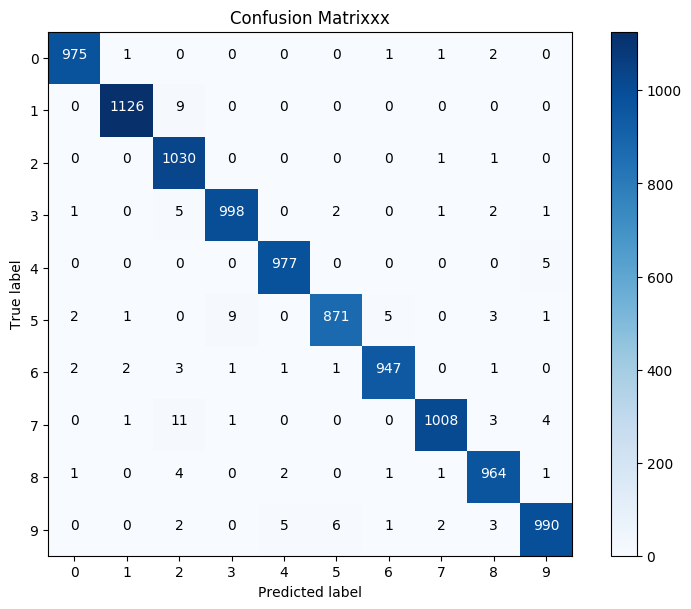

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

# 计算混淆矩阵
cm1 = confusion_matrix(y_true, y_pred1)  # 修改为cm1
classes = [str(i) for i in range(10)]

plt.figure(figsize=(8, 6))
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Blues)  # 修改为cm1
plt.title("Confusion Matrixxx")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm1.max() / 2  # 修改为cm1
for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):  # 修改为cm1
    plt.text(j, i, format(cm1[i, j], 'd'), horizontalalignment="center", color="white" if cm1[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [23]:
# 打印分类报告
cr1 = classification_report(y_true, y_pred1, digits=7)
print('分类报告：')
print(cr1)

分类报告：
              precision    recall  f1-score   support

           0  0.9938838 0.9948980 0.9943906       980
           1  0.9955791 0.9920705 0.9938217      1135
           2  0.9680451 0.9980620 0.9828244      1032
           3  0.9890981 0.9881188 0.9886082      1010
           4  0.9918782 0.9949084 0.9933910       982
           5  0.9897727 0.9764574 0.9830700       892
           6  0.9916230 0.9885177 0.9900680       958
           7  0.9940828 0.9805447 0.9872674      1028
           8  0.9846782 0.9897331 0.9871992       974
           9  0.9880240 0.9811695 0.9845848      1009

    accuracy                      0.9886000     10000
   macro avg  0.9886665 0.9884480 0.9885225     10000
weighted avg  0.9886787 0.9886000 0.9886042     10000



In [24]:
print(cr)
print(cr1)

              precision    recall  f1-score   support

           0  0.9796541 0.9826531 0.9811513       980
           1  0.9945405 0.9629956 0.9785139      1135
           2  0.9764012 0.9622093 0.9692533      1032
           3  0.9545455 0.9772277 0.9657534      1010
           4  0.9762887 0.9643585 0.9702869       982
           5  0.9825986 0.9495516 0.9657925       892
           6  0.9640288 0.9791232 0.9715173       958
           7  0.9242701 0.9854086 0.9538606      1028
           8  0.9646570 0.9527721 0.9586777       974
           9  0.9621514 0.9573835 0.9597615      1009

    accuracy                      0.9675000     10000
   macro avg  0.9679136 0.9673683 0.9674568     10000
weighted avg  0.9679871 0.9675000 0.9675564     10000

              precision    recall  f1-score   support

           0  0.9938838 0.9948980 0.9943906       980
           1  0.9955791 0.9920705 0.9938217      1135
           2  0.9680451 0.9980620 0.9828244      1032
           3  0.9890981 

**END.**